In [18]:
import pandas as pd
from kmodes.kmodes import KModes

# Load the Mall Customer dataset (example using seaborn)
import seaborn as sns
mall_data = pd.read_csv('dataset/Mall_Customers.csv')
mall_data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Drop unnecessary columns (e.g., customer ID)
mall_data = mall_data.drop(['CustomerID'], axis=1)



In [20]:

# Convert numerical columns to categorical if necessary
# (e.g., age_group based on age ranges)
mall_data['age_group'] = pd.cut(mall_data['Age'], bins=[0, 30, 50, float('inf')], labels=['Young', 'Middle-aged', 'Senior'])


In [21]:
# Select categorical features for clustering
# (e.g., gender, age_group)
categorical_features = ['Gender', 'age_group']



In [22]:
# Initialize KModes with desired number of clusters
k = 5  # Example: 5 clusters
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)



In [23]:
# Fit the model to the data (selecting only categorical features)
clusters = km.fit_predict(mall_data[categorical_features])



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 38.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 18.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28, cost: 28.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 22.0
Best run was number 1


In [24]:
# Add cluster labels to the original dataset
mall_data['cluster'] = clusters



In [25]:
# Print cluster centroids
print("Cluster centroids:")
print(pd.DataFrame(km.cluster_centroids_, columns=categorical_features))



Cluster centroids:
   Gender    age_group
0  Female        Young
1    Male        Young
2  Female  Middle-aged
3    Male       Senior
4    Male  Middle-aged


In [27]:
# Print cluster labels
print("\nCluster labels:")
print(mall_data[['Gender', 'age_group', 'cluster']].head())


Cluster labels:
   Gender    age_group  cluster
0    Male        Young        1
1    Male        Young        1
2  Female        Young        0
3  Female        Young        0
4  Female  Middle-aged        2


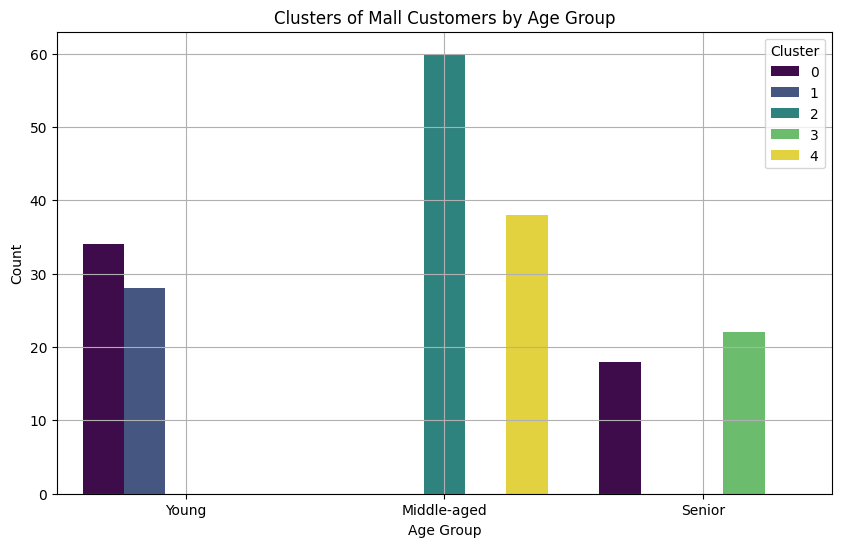

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='cluster', data=mall_data, palette='viridis')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Clusters of Mall Customers by Age Group')

# Show the plot
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


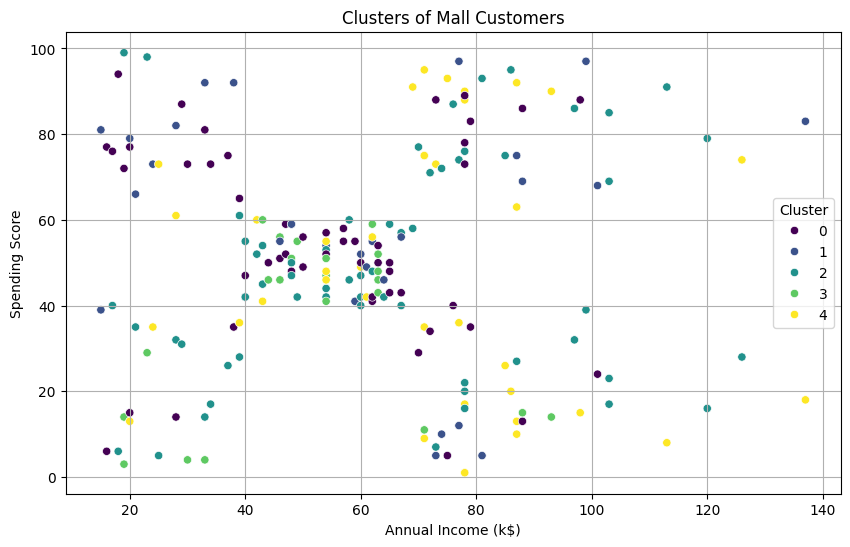

In [29]:

import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=mall_data, palette='viridis', legend='full')

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Clusters of Mall Customers')

# Show the plot
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
